In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from utils import ConvexPolygon, SimpleRandomConvexSet


def create_realization(fixed=False) -> ConvexPolygon:
    """
    Create a realization of a random line segment between two points on the unit circle.

    Parameters
    ----------
    fixed : bool, optional
        If True, fixes the first point at -π/2 radians (south point of the circle).
        If False (default), both points are placed randomly on the unit circle.

    Returns
    -------
    ConvexPolygon
        A convex polygon defined by two points on the unit circle,
        creating a chord. The first point is fixed at the [0,-1] if
        fixed=True, otherwise both points are random.
    """

    # determining the angle to the both points
    angle_a = np.random.uniform(0, 2*np.pi) if not fixed else -np.pi/2
    angle_b = np.random.uniform(0, 2*np.pi)

    # constructing 2D points (on the unit circle) from corresponding angles
    a = [np.cos(angle_a), np.sin(angle_a)]
    b = [np.cos(angle_b), np.sin(angle_b)]

    return ConvexPolygon([a,b])


In [3]:
# defining simple random set using 100 000 realizations of the original random set
# without the fixed point
RS = SimpleRandomConvexSet([create_realization() for _ in range(100_000)])
# with the fixed point at [0,-1]
RS_fixed = SimpleRandomConvexSet([create_realization(True) for _ in range(100_000)])

In [6]:
RS.aumann().points

array([[ 5.37705125e-05, -4.07940086e-01],
       [ 5.99589440e-05, -4.07940086e-01],
       [ 6.11831037e-05, -4.07940086e-01],
       ...,
       [ 3.42636488e-05, -4.07940086e-01],
       [ 4.88424350e-05, -4.07940086e-01],
       [ 5.37705125e-05, -4.07940086e-01]], shape=(200001, 2))

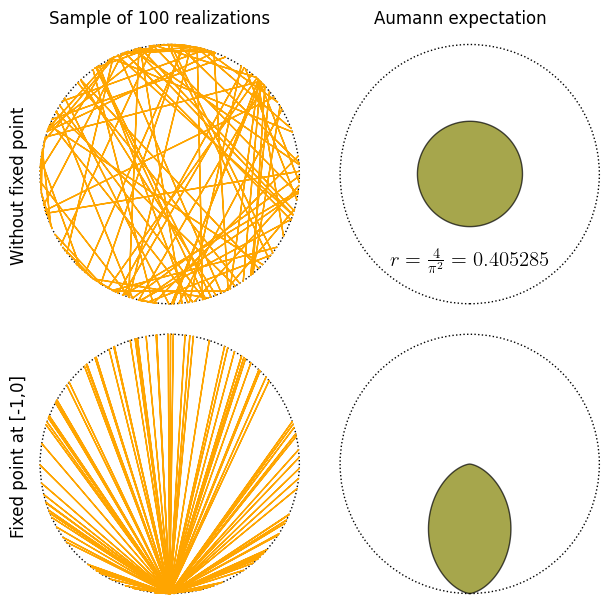

In [5]:
# graphical output - sample of realizations and the Aumann expectations
fig, ax = plt.subplots(2,2, figsize=(6,6), constrained_layout=True)
for s1,s2 in zip(RS.sets[:100], RS_fixed.sets[:100]):
    ax[0,0].plot(s1.points[:,0],s1.points[:,1], lw=1, c="orange")
    ax[1,0].plot(s2.points[:,0],s2.points[:,1], lw=1, c="orange")

ax[0,0].set_title("Sample of 100 realizations", fontsize=12)
ax[0,1].set_title("Aumann expectation", fontsize=12)
ax[0,1].text(0,-0.7,"$r={4\\over\\pi^2}=0.405285$", ha="center", usetex=True, fontsize=15)
fig.text(0,0.7,"Without fixed point", va="center", rotation=90, fontsize=12)
fig.text(0,0.25,"Fixed point at [-1,0]", va="center", rotation=90, fontsize=12)

plt.setp(ax, aspect="equal", xlim=(-1.2, 1.05), ylim=(-1.05, 1.1))

for a in np.ravel(ax):
    a.add_patch(patch.Circle((0, 0), 1, ec="black", fill=False, ls=":"))
    a.axis("off")

ax[0,1].add_patch(patch.Polygon(RS.aumann().points, ec="black", fc="olive", alpha=0.7))
ax[1,1].add_patch(patch.Polygon(RS_fixed.aumann().points, ec="black", fc="olive", alpha=0.7))

plt.show()